In [1]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

df_train = pd.read_csv('ShelterTrain.csv',sep=',')

In [2]:
df_train[:5]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


<h2>I will do a quick count of the features and check how they compare with possible values </h2>

<h3>Animal Type</h3>

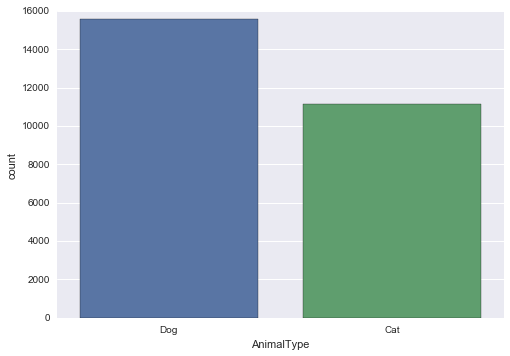

In [3]:
sns.countplot(df_train.AnimalType)

<h3>Outcome Type</h3>

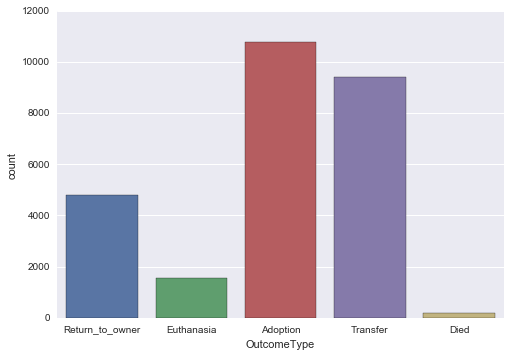

In [4]:
sns.countplot(df_train.OutcomeType)

<h3>Ageupon Outcome</h3></br><h4>Check the values for Ageupon Outcome and figure out a way to categorize it better</h4>

In [5]:
df_train.AgeuponOutcome.value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
9 years       288
7 months      288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
4 days         50
6 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

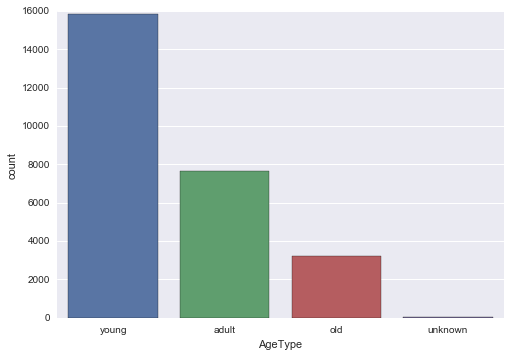

In [6]:
def get_age(x):
    x = str(x)
    if x.find('days') >= 0: return int(x.replace(" days", ""))
    if x.find('day') >= 0: return int(x.replace(" day", ""))
    if x.find('weeks') >= 0: return int(x.replace(" weeks", ""))*7
    if x.find('week') >= 0: return int(x.replace(" week", ""))*7
    if x.find('months') >= 0: return int(x.replace(" months", ""))*30
    if x.find('month') >= 0: return int(x.replace(" month", ""))*30
    if x.find('years') >= 0: return int(x.replace(" years", ""))*365
    if x.find('year') >= 0: return int(x.replace(" year", ""))*365
    return 'unknown'
df_train['Age'] = df_train.AgeuponOutcome.apply(get_age)

def get_ageType(x):
    if x == "unknown": return "unknown"
    if int(x) <= 365: return "young"
    if int(x) <= 1825: return "adult"
    return "old"

df_train['AgeType'] = df_train.Age.apply(get_ageType)
sns.countplot(df_train.AgeType)

<h3>Sexupon Outcome</h3>	

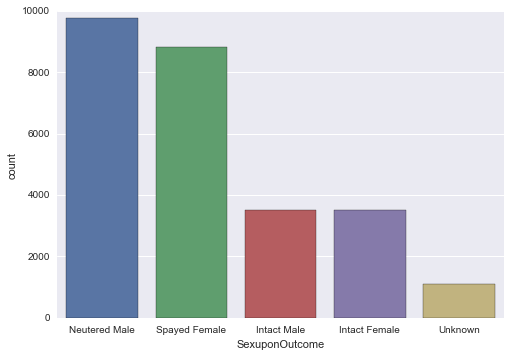

In [7]:
sns.countplot(df_train.SexuponOutcome)

<h3>Breed</h3></br><h4>Categorize breed as mix or not</h4>

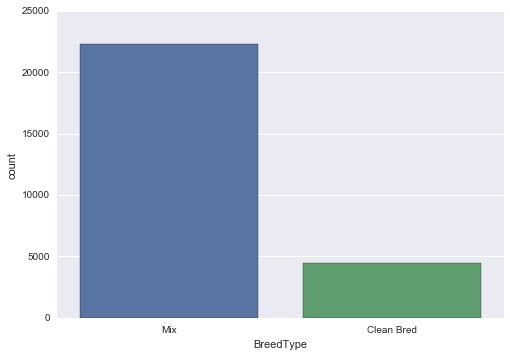

In [8]:
def get_mix(x):
    x = str(x)
    if x.find('Mix') >= 0: return "Mix"
    return 'Clean Bred'
df_train['BreedType'] = df_train.Breed.apply(get_mix)

sns.countplot(df_train.BreedType)

<h3>Color</h3></br><h4>Check values and come up with a good way to categorize color</h4>

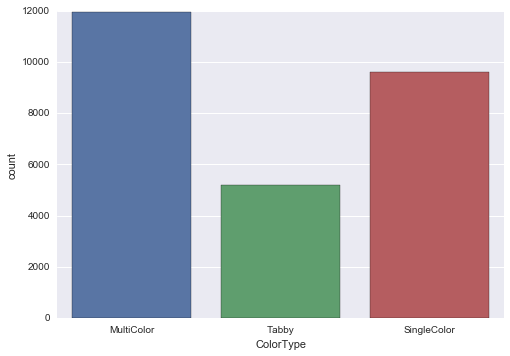

In [9]:
def get_colorType(x):
    x = str(x)
    if x.find('Tabby') >= 0: return "Tabby"
    if x.find('/') >= 0: return "MultiColor"  
    return 'SingleColor'
df_train['ColorType'] = df_train.Color.apply(get_colorType)

sns.countplot(df_train.ColorType)

<h3>Has Name</h3>

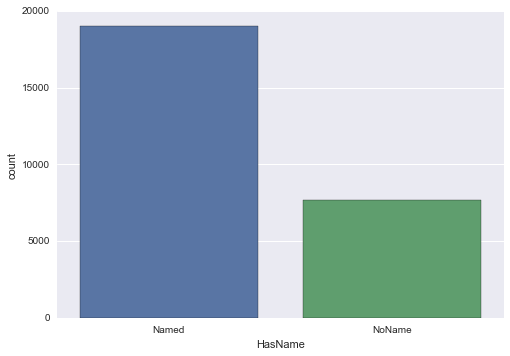

In [10]:
def has_name(x):
    if x != x : return "NoName"
    return 'Named'

df_train['HasName'] = df_train.Name.apply(has_name)

sns.countplot(df_train.HasName)

<h2>Now I will try and figure out if any of these parameters have a significant effect on the outcome</h2>

<h3>Animal Type</h3>

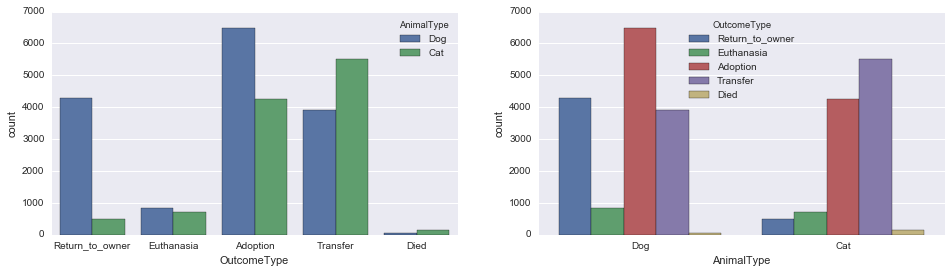

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='AnimalType', ax=ax1)
sns.countplot(data=df_train, x='AnimalType',hue='OutcomeType', ax=ax2)

It can be seen that dogs have a higher chance in return_to_owner and adoption where as cats have a better chance in transfer.

<h3>Age</h3>

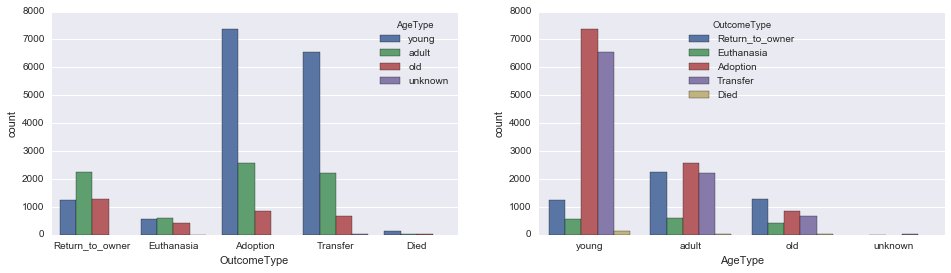

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='AgeType', ax=ax1)
sns.countplot(data=df_train, x='AgeType',hue='OutcomeType', ax=ax2)

It can be seen that young animals have a better chance in adoption or transfer, where as for older anials the outcome is distributed more evenly, death rate is very low in general

<h3>Sexupon Outcome</h3>    

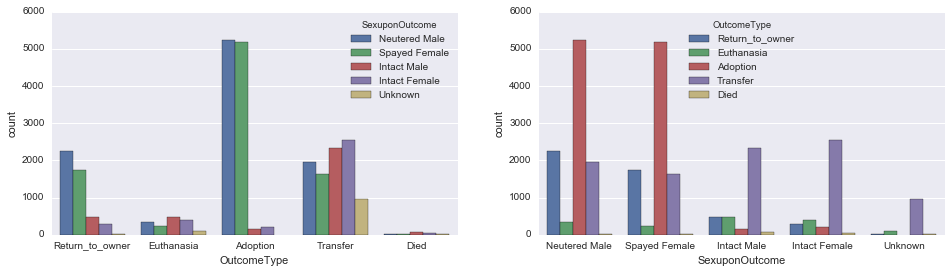

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='SexuponOutcome', ax=ax1)
sns.countplot(data=df_train, x='SexuponOutcome',hue='OutcomeType', ax=ax2)

It can be seen that for neutered/spayed animals adoption is a much greater chance and intact animals get transfered more often

<h3>Breed</h3>

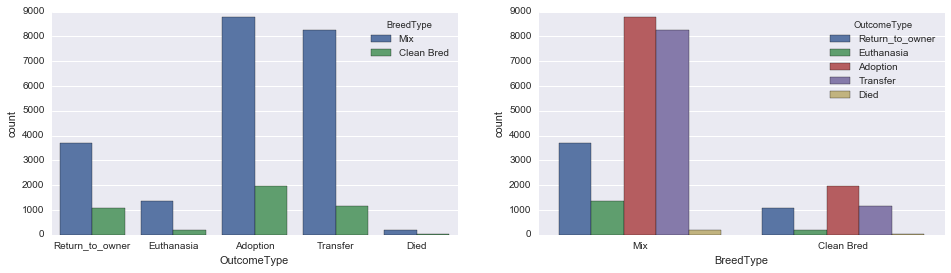

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='BreedType', ax=ax1)
sns.countplot(data=df_train, x='BreedType',hue='OutcomeType', ax=ax2)

The classification for breeds might not be very good, but the outcome is less predictable for clean bred animals compared to mixed ones.

<h3>Color</h3>

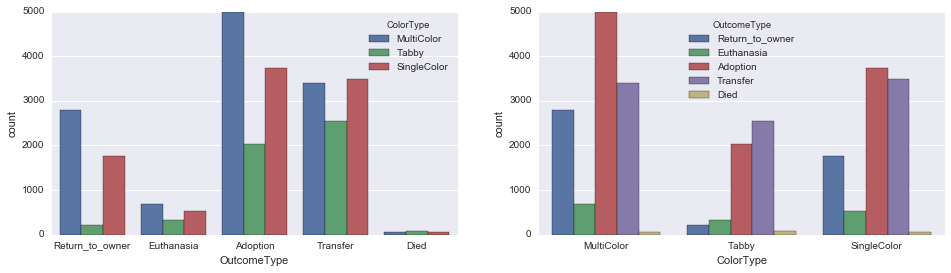

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='ColorType', ax=ax1)
sns.countplot(data=df_train, x='ColorType',hue='OutcomeType', ax=ax2)

Color, in the way I have categorized it doesn't say much as well

<h3>Has Name</h3>

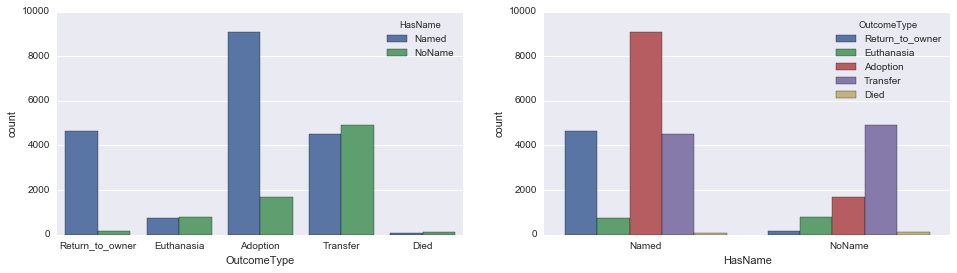

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df_train, x='OutcomeType',hue='HasName', ax=ax1)
sns.countplot(data=df_train, x='HasName',hue='OutcomeType', ax=ax2)

It's no surprize that the majority of animals who return to their owner are named. But the majority of the named animals get adopted and most adopted animals have names.

<h2>Choosing features and representing them numerically</h2>

I will create a feature matrix 

<strong>animal type</strong> - representing it as
<br>1 - cat
<br>2 - dog

<strong>age</strong> - representing it as the day values calculated above

<strong>sex</strong> - representing it as
<br>0 - unknown
<br>1 - neutered/spayed
<br>2 - intact

<strong>hasName</strong> - representing it as
<br>0 - no
<br>1 - yes

And the <strong>output</strong> (i.e. Y matrix) as
<br>1 - return to owner
<br>2 - euthanasia
<br>3 - adoption
<br>4 - transfer
<br>5 - died

In [36]:
def get_numeric_animal_type(x):
    x = str(x)
    if x.find('Dog') >= 0: return 2
    return 1
df_train['numeric_animal_type'] = df_train.AnimalType.apply(get_numeric_animal_type)

def get_numeric_sex_type(x):
    x = str(x)
    if x.find('Neutered') >= 0: return 1
    if x.find('Spayed') >= 0: return 1
    if x.find('Intact') >= 0: return 2
    return 0
df_train['numeric_sex_type'] = df_train.SexuponOutcome.apply(get_numeric_sex_type)

def get_numeric_hasName(x):
    x = str(x)
    if x.find('Named') >= 0: return 1
    return 0
df_train['numeric_hasName'] = df_train.HasName.apply(get_numeric_hasName)

def get_numeric_outcome(x):
    x = str(x)
    if x.find('Return_to_owner') >= 0: return 1
    if x.find('Euthanasia') >= 0: return 2
    if x.find('Adoption') >= 0: return 3
    if x.find('Transfer') >= 0: return 4
    if x.find('Died') >= 0: return 5
    return 0
df_train['numeric_outcome'] = df_train.OutcomeType.apply(get_numeric_outcome)

In [38]:
A = np.hstack([
        np.matrix(df_train.numeric_animal_type).T, 
        np.matrix(df_train.Age).T, 
        np.matrix(df_train.numeric_sex_type).T, 
        np.matrix(df_train.numeric_hasName).T])

Y = np.matrix(df_train.numeric_outcome).T

print (A[:5])
print (Y[:5])

[[2 365 1 1]
 [1 365 1 1]
 [2 730 1 1]
 [1 21 2 0]
 [2 730 1 0]]
[[1]
 [2]
 [3]
 [4]
 [4]]
